In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import missingno as msno
import matplotlib as mpl
import matplotlib
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [2]:
df = pd.read_excel('D:/programming/쌀_품1.xlsx')
df.head()

,품종명,품종,제현율,도정율,백미 완전립 비율,완전미도정수율,싸라기,분상질립,장폭비,심복백(0~9),...,단백질 함량(%),아밀로스함량(%),밥맛관능검정(-3∼+3),투명도1~9,경도,수분,피해립,열손립,기타이물,용도 및 특이점
0,수원619호,미소찬,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,밥쌀용
1,제이제이621엠알,JJ621MR,82.9,74.4,NaN,72.3,NaN,NaN,NaN,NaN,...,6.5,19.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,밥쌀용
2,수원636호,월하미,83.6,74.1,67.8,50.2,17.2,12.5,3.2,0/2,...,6.8,23.3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,밥쌀용:수출용(동남아시아 종자수출용)
3,전주623호,참동진,NaN,75.1,NaN,NaN,NaN,NaN,NaN,NaN,...,5.7,18.7,0.11,NaN,NaN,NaN,NaN,NaN,NaN,"밥쌀용(신동진 대체품종, 브랜드 바로적용 가능)"
4,진부63호,진평,NaN,NaN,NaN,74.3,NaN,NaN,NaN,NaN,...,5.6,18.8,0.42,NaN,NaN,NaN,NaN,NaN,NaN,밥쌀용


In [3]:
print(platform.system()) # 플랫폼 확인
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')
# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False
df.index = df

Windows


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, ('수원619호', '미소찬', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '밥쌀용') to (nan, '참드림', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.4, 19.5, nan, nan, nan, nan, nan, nan, nan, nan)
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   품종명            273 non-null    object 
 1   품종             281 non-null    object 
 2   제현율            166 non-null    float64
 3   도정율            218 non-null    float64
 4   백미 완전립 비율      188 non-null    float64
 5   완전미도정수율        73 non-null     float64
 6   싸라기            22 non-null     object 
 7   분상질립           32 non-null     float64
 8   장폭비            194 non-null    float64
 9   심복백(0~9)       241 non-null    object 
 10  알카리붕괴도(1~7)    148 non-null    float64
 11  윤기치            14 non-null     float64
 12  단백질 함량(%)      167 non-null    float64
 13  아밀로스함량(

In [5]:
dfnull= df.isnull().sum()
dfnull

품종명                8
품종                 0
제현율              115
도정율               63
백미 완전립 비율         93
완전미도정수율          208
싸라기              259
분상질립             249
장폭비               87
심복백(0~9)          40
알카리붕괴도(1~7)      133
윤기치              267
단백질 함량(%)        114
아밀로스함량(%)         24
밥맛관능검정(-3∼+3)    186
투명도1~9           105
경도               276
수분               281
피해립              277
열손립              281
기타이물             281
용도 및 특이점         161
dtype: int64

In [6]:
df.dtypes

품종명               object
품종                object
제현율              float64
도정율              float64
백미 완전립 비율        float64
완전미도정수율          float64
싸라기               object
분상질립             float64
장폭비              float64
심복백(0~9)          object
알카리붕괴도(1~7)      float64
윤기치              float64
단백질 함량(%)        float64
아밀로스함량(%)        float64
밥맛관능검정(-3∼+3)    float64
투명도1~9           float64
경도               float64
수분               float64
피해립              float64
열손립              float64
기타이물             float64
용도 및 특이점          object
dtype: object

In [7]:
pd.to_numeric(df['완전미도정수율'])

(수원619호, 미소찬, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                               NaN
(제이제이621엠알, JJ621MR, 82.9, 74.4, nan, 72.3, nan, nan, nan, nan, nan, nan, 6.5, 19.7, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                   72.3
(수원636호, 월하미, 83.6, 74.1, 67.8, 50.2, 17.2, 12.5, 3.2, 0/2, 7.0, 62.7, 6.8, 23.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))     50.2
(전주623호, 참동진, nan, 75.1, nan, nan, nan, nan, nan, nan, nan, nan, 5.7, 18.7, 0.11, nan, nan, nan, nan, nan, nan, 밥쌀용(신동진 대체품종, 브랜드 바로적용 가능))     NaN
(진부63호, 진평, nan, nan, nan, 74.3, nan, nan, nan, nan, nan, 79.4, 5.6, 18.8, 0.42, nan, nan, nan, nan, nan, nan, 밥쌀용)                            74.3
                                                                                                                                               ... 
(nan, 백진주, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.6, 9.1, nan, nan, nan, nan, nan, nan, nan, nan)  

In [8]:
pd.to_numeric(df['알카리붕괴도(1~7)'])

(수원619호, 미소찬, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                              NaN
(제이제이621엠알, JJ621MR, 82.9, 74.4, nan, 72.3, nan, nan, nan, nan, nan, nan, 6.5, 19.7, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                   NaN
(수원636호, 월하미, 83.6, 74.1, 67.8, 50.2, 17.2, 12.5, 3.2, 0/2, 7.0, 62.7, 6.8, 23.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))     7.0
(전주623호, 참동진, nan, 75.1, nan, nan, nan, nan, nan, nan, nan, nan, 5.7, 18.7, 0.11, nan, nan, nan, nan, nan, nan, 밥쌀용(신동진 대체품종, 브랜드 바로적용 가능))    NaN
(진부63호, 진평, nan, nan, nan, 74.3, nan, nan, nan, nan, nan, 79.4, 5.6, 18.8, 0.42, nan, nan, nan, nan, nan, nan, 밥쌀용)                            NaN
                                                                                                                                              ... 
(nan, 백진주, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.6, 9.1, nan, nan, nan, nan, nan, nan, nan, nan)        

In [9]:
pd.to_numeric(df['밥맛관능검정(-3∼+3)'])

(수원619호, 미소찬, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                               NaN
(제이제이621엠알, JJ621MR, 82.9, 74.4, nan, 72.3, nan, nan, nan, nan, nan, nan, 6.5, 19.7, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                    NaN
(수원636호, 월하미, 83.6, 74.1, 67.8, 50.2, 17.2, 12.5, 3.2, 0/2, 7.0, 62.7, 6.8, 23.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))      NaN
(전주623호, 참동진, nan, 75.1, nan, nan, nan, nan, nan, nan, nan, nan, 5.7, 18.7, 0.11, nan, nan, nan, nan, nan, nan, 밥쌀용(신동진 대체품종, 브랜드 바로적용 가능))    0.11
(진부63호, 진평, nan, nan, nan, 74.3, nan, nan, nan, nan, nan, 79.4, 5.6, 18.8, 0.42, nan, nan, nan, nan, nan, nan, 밥쌀용)                            0.42
                                                                                                                                               ... 
(nan, 백진주, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.6, 9.1, nan, nan, nan, nan, nan, nan, nan, nan)  

<AxesSubplot:>

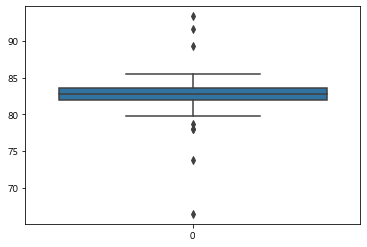

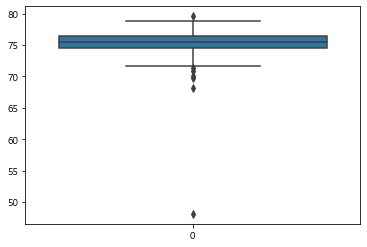

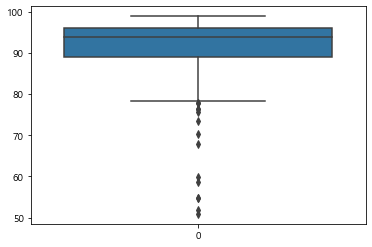

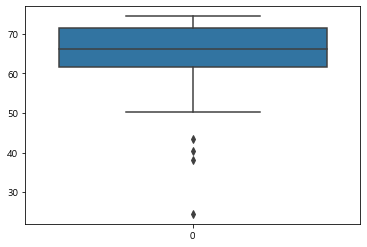

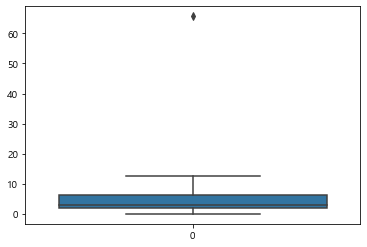

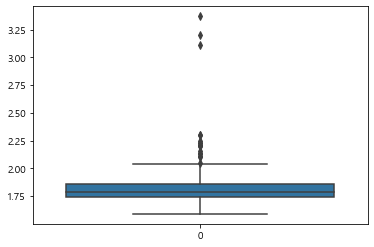

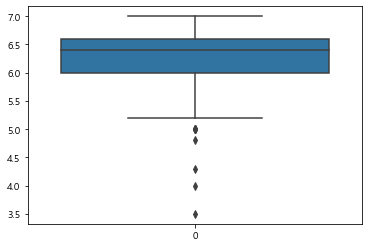

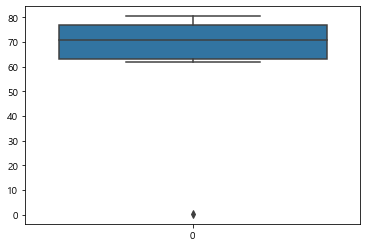

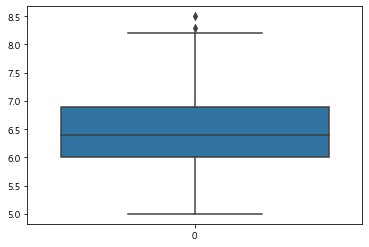

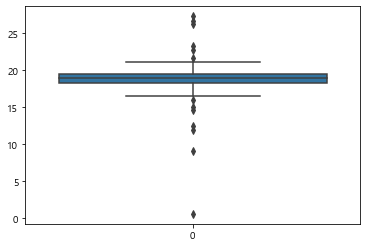

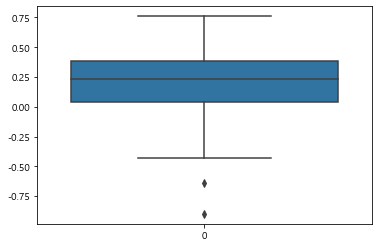

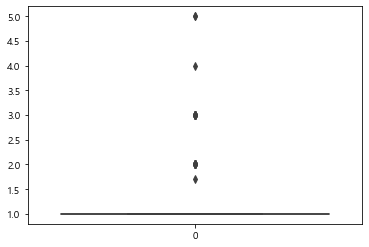

In [23]:
plt.figure(1)
sns.boxplot(data=df["제현율"])

plt.figure(2)
sns.boxplot(data=df["도정율"])

plt.figure(3)
sns.boxplot(data=df["백미 완전립 비율"])

plt.figure(4)
sns.boxplot(data=df["완전미도정수율"])

plt.figure(5)
sns.boxplot(data=df["분상질립"])

plt.figure(6)
sns.boxplot(data=df["장폭비"])

plt.figure(7)
sns.boxplot(data=df["알카리붕괴도(1~7)"])

plt.figure(8)
sns.boxplot(data=df["윤기치"])

plt.figure(9)
sns.boxplot(data=df["단백질 함량(%)"])

plt.figure(10)
sns.boxplot(data=df["아밀로스함량(%)"])

plt.figure(11)
sns.boxplot(data=df["밥맛관능검정(-3∼+3)"])

plt.figure(12)
sns.boxplot(data=df["투명도1~9"])


In [91]:
def outlier_iqr(data, column):

    global lower, uppper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    print('IQR은',iqr,'이다.')
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')

    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]

    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

제현율--------------------------
IQR은 1.5999999999999943 이다.
lower bound 값은 79.60000000000001 이다.
upper bound 값은 85.99999999999999 이다.
총 이상치 개수는 8 이다.
--------------------------------


,품종,제현율
"(수원392호, 농안, 93.4, 73.3, 92.4, nan, nan, nan, nan, 2/0, 6.8, nan, nan, 16.0, nan, 1.0, nan, nan, nan, nan, nan, nan)",농안,93.4
"(밀양107호, 조령, 91.6, 73.9, 95.7, nan, nan, nan, nan, 0/1, 7.0, nan, nan, 16.5, nan, 1.0, nan, nan, nan, nan, nan, nan)",조령,91.6
"(익산454호, 만호, 89.4, 74.6, 94.2, nan, nan, nan, 1.68, 0/1, nan, nan, nan, 19.0, nan, 1.0, nan, nan, nan, nan, nan, nan)",만호,89.4
"(남양17호, 서진, 85.5, 77.7, 95.3, nan, nan, nan, 1.86, 1, nan, nan, nan, 18.3, nan, 1.0, nan, nan, nan, nan, nan, nan)",서진,85.5
"(익산438호, 신동진, 85.1, 77.9, 91.4, nan, nan, nan, nan, nan, 5.8, nan, 7.6, 18.6, 0.23, nan, 6.4, nan, nan, nan, nan, nan)",신동진,85.1
...,...,...
"(밀양288호, 한아름찰, 78.7, 71.9, 77.9, 56.0, nan, nan, 2.13, nan, 5.6, nan, 7.5, nan, nan, 5.0, nan, nan, nan, nan, nan, 가공용:떡등)",한아름찰,78.7
"(영덕3호, 영덕, 78.0, nan, nan, nan, nan, nan, nan, 0/0, 7.0, nan, nan, 18.9, nan, 1.0, nan, nan, nan, nan, nan, nan)",영덕,78.0
"(밀양30호, 밀양30호, 78.0, 75.2, nan, nan, nan, nan, nan, 1/1, nan, nan, nan, 19.0, nan, nan, nan, nan, nan, nan, nan, nan)",밀양30호,78.0
"(밀양282호, 눈큰흑찰1호, 73.7, nan, nan, nan, nan, nan, 2.14, nan, nan, nan, 7.1, nan, nan, nan, nan, nan, nan, nan, nan, 혼반및특수용도용 (발아현미등))",눈큰흑찰1호,73.7


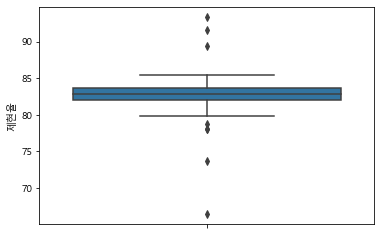

In [92]:
print('제현율--------------------------')
je = df.loc[:,['품종','제현율']]
jee=je.sort_values(by='제현율' ,ascending=False)
jeee=jee.dropna(axis=0)
jeeee=outlier_iqr(jeee,'제현율')
print('--------------------------------')
sns.boxplot(y=jeee["제현율"])
jeee

도정율--------------------------
IQR은 2.0 이다.
lower bound 값은 71.5 이다.
upper bound 값은 79.5 이다.
총 이상치 개수는 7 이다.
--------------------------------


,품종,도정율
"(남양5호, 장안, 84.7, 79.6, 95.2, nan, nan, nan, nan, 0/1, nan, nan, nan, 19.0, nan, 1.0, nan, nan, nan, nan, nan, nan)",장안,79.6
"(진부7호, 오봉, 84.5, 78.9, 96.6, nan, nan, nan, 1.79, 1/1, nan, nan, nan, 19.4, nan, 5.0, nan, nan, nan, nan, nan, nan)",오봉,78.9
"(이리348호, 동진, 83.7, 78.6, nan, nan, nan, nan, nan, 0/1, nan, nan, nan, 19.8, nan, nan, nan, nan, nan, nan, nan, nan)",동진,78.6
"(영덕44호, 칠보, nan, 78.5, 92.5, nan, nan, nan, 1.78, 0/0, nan, nan, 6.4, 18.3, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)",칠보,78.5
"(밀양125호, 금오1호, nan, 78.4, nan, nan, nan, nan, 1.74, 0/1, 7.0, nan, nan, 20.4, nan, 1.0, nan, nan, nan, nan, nan, nan)",금오1호,78.4
...,...,...
"(수원523호, 안미, 82.8, 70.8, 85.6, 60.1, nan, nan, 1.84, 0/0, 6.6, nan, 6.9, 18.0, 0.15, 1.0, nan, nan, nan, nan, nan, 밥쌀용)",안미,70.8
"(밀양237호, 신백, 82.3, 70.1, 79.2, nan, nan, nan, 1.75, 0/0, 6.7, nan, 8.5, 17.8, -0.16, nan, nan, nan, nan, nan, nan, 밥쌀용)",신백,70.1
"(밀양265호, 중모1034, 79.8, 69.7, 90.8, 63.3, nan, nan, 1.83, 0/1, 5.2, nan, 6.7, 19.6, -0.64, 1.0, nan, nan, nan, nan, nan, 밥쌀용)",중모1034,69.7
"(익산467호, 한마음, 83.5, 68.2, 70.4, nan, nan, nan, 1.9, 1/1, 6.2, nan, 6.3, 19.1, 0.31, 1.0, nan, nan, nan, nan, nan, nan)",한마음,68.2


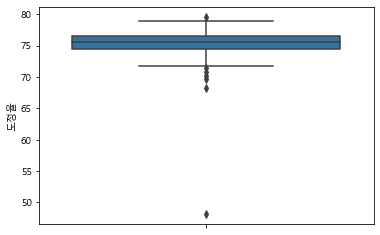

In [71]:
print('도정율--------------------------')
do = df.loc[:,['품종','도정율']]
doo=do.sort_values(by='도정율' ,ascending=False)
dooo=doo.dropna(axis=0)
outlier_iqr(dooo,'도정율')
print('--------------------------------')
sns.boxplot(y=dooo["도정율"])
dooo

백미 완전립 비율------------------
IQR은 7.075000000000003 이다.
lower bound 값은 78.3375 이다.
upper bound 값은 106.63750000000002 이다.
총 이상치 개수는 14 이다.
--------------------------------


,품종,백미 완전립 비율
"(이리416호, 남평, 82.8, 75.4, 98.9, nan, nan, nan, nan, 0/0, nan, nan, 7.0, 18.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용)",남평,98.9
"(영덕45호, 진보, nan, 77.3, 98.8, nan, nan, nan, 1.81, 0/0, nan, nan, 6.1, 18.3, nan, nan, nan, nan, nan, nan, nan, 밥쌀용(무균포장밥용)",진보,98.8
"(수원516호, 청해진미, nan, 76.9, 98.8, nan, nan, nan, 1.79, 0/0, nan, nan, 5.9, 20.3, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)",청해진미,98.8
"(밀양138호, 화봉, 83.1, 76.3, 98.6, nan, nan, nan, 1.77, 0/1, nan, nan, nan, 19.2, nan, nan, nan, nan, nan, nan, nan, nan)",화봉,98.6
"(수원503호, 청안, nan, 75.1, 98.4, nan, nan, nan, 1.7, 0/0, nan, nan, 6.4, 18.7, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)",청안,98.4
...,...,...
"(밀양240호, 한아름2호, 82.0, 72.6, 58.6, nan, nan, nan, 2.16, 2/0, 6.0, nan, 8.2, 17.5, -0.9, 1.0, nan, nan, nan, nan, nan, 초다수가공용)",한아름2호,58.6
"(KGIR6호, 한열, nan, 72.0, 54.8, 61.0, nan, nan, 3.11, nan, nan, nan, nan, 20.8, nan, nan, nan, nan, nan, nan, nan, 밥쌀용:수출용(베트남, 미얀마 등 열대지역 종자 수출용))",한열,54.8
"(수원624호, 케이지에이치알1호, 82.4, 73.8, 54.8, 40.5, 33.7, 9.8, 3.37, 0/1, 7.0, 64.0, 6.3, 22.7, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))",케이지에이치알1호,54.8
"(밀양286호, 한아름3호, 80.1, 73.5, 51.8, 38.1, nan, nan, 2.23, 4/1, 6.7, nan, 7.3, 18.2, nan, 1.0, nan, nan, nan, nan, nan, 가공용(쌀가루, 떡 등))",한아름3호,51.8


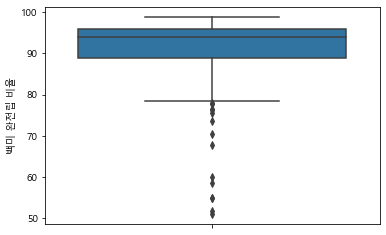

In [72]:
print('백미 완전립 비율------------------')
plt.figure(3)
be = df.loc[:,['품종','백미 완전립 비율']]
bee= be.sort_values(by='백미 완전립 비율' ,ascending=False)
beee=bee.dropna(axis=0)
outlier_iqr(beee,'백미 완전립 비율')
print('--------------------------------')
sns.boxplot(y=beee["백미 완전립 비율"])
beee

장폭비--------------------------
IQR은 0.1200000000000001 이다.
lower bound 값은 1.5599999999999998 이다.
upper bound 값은 2.04 이다.
총 이상치 개수는 17 이다.
--------------------------------


,품종,장폭비
"(수원624호, 케이지에이치알1호, 82.4, 73.8, 54.8, 40.5, 33.7, 9.8, 3.37, 0/1, 7.0, 64.0, 6.3, 22.7, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))",케이지에이치알1호,3.37
"(수원636호, 월하미, 83.6, 74.1, 67.8, 50.2, 17.2, 12.5, 3.2, 0/2, 7.0, 62.7, 6.8, 23.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))",월하미,3.20
"(KGIR6호, 한열, nan, 72.0, 54.8, 61.0, nan, nan, 3.11, nan, nan, nan, nan, 20.8, nan, nan, nan, nan, nan, nan, nan, 밥쌀용:수출용(베트남, 미얀마 등 열대지역 종자 수출용))",한열,3.11
"(수원332호, 용문벼, 82.0, nan, nan, nan, nan, nan, 2.3, 1/1, nan, nan, nan, 17.0, nan, nan, nan, nan, nan, nan, nan, nan)",용문벼,2.30
"(수원333호, 용주벼, 82.4, nan, nan, nan, nan, nan, 2.3, 1/1, 4.3, nan, nan, 17.4, nan, nan, nan, nan, nan, nan, nan, nan)",용주벼,2.30
...,...,...
"(수원304호, 소백, 80.6, 73.2, 92.7, nan, nan, nan, 1.62, 1/0, nan, nan, nan, 16.5, nan, 3.0, nan, nan, nan, nan, nan, nan)",소백,1.62
"(운봉54호, 운백찰, 80.6, 72.3, 87.5, nan, nan, nan, 1.6, nan, 5.4, nan, 6.5, nan, nan, nan, nan, nan, nan, nan, nan, 가공용(조기출하))",운백찰,1.60
"(운봉52호, 운일찰, 82.9, 76.0, 87.6, nan, nan, nan, 1.6, nan, 5.6, nan, 6.2, nan, nan, nan, nan, nan, nan, nan, nan, 특수미)",운일찰,1.60
"(영덕32호, 삼덕, nan, 75.0, 95.2, nan, nan, nan, 1.6, 0/1, 6.2, nan, 7.5, 18.7, 0.15, nan, nan, nan, nan, nan, nan, nan)",삼덕,1.60


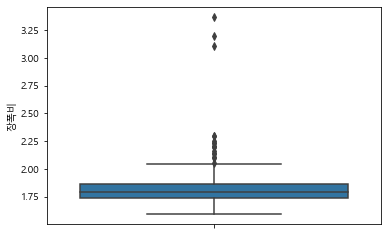

In [73]:
print('장폭비--------------------------')
plt.figure(4)
ja = df.loc[:,['품종','장폭비']]
jaa=ja.sort_values(by='장폭비' ,ascending=False)
jaaa=jaa.dropna(axis=0)
outlier_iqr(jaaa,'장폭비')
print('--------------------------------')
sns.boxplot(y=jaaa["장폭비"])
jaaa

알카리붕괴도(1~7)-----------------
IQR은 0.5999999999999996 이다.
lower bound 값은 5.1000000000000005 이다.
upper bound 값은 7.499999999999999 이다.
총 이상치 개수는 11 이다.
--------------------------------


,품종,알카리붕괴도(1~7)
"(수원636호, 월하미, 83.6, 74.1, 67.8, 50.2, 17.2, 12.5, 3.2, 0/2, 7.0, 62.7, 6.8, 23.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))",월하미,7.0
"(영덕5호, 동해, 82.0, nan, nan, nan, nan, nan, 1.78, 0/1, 7.0, nan, nan, 19.5, nan, 1.0, nan, nan, nan, nan, nan, nan)",동해,7.0
"(밀양142호, 대산, 82.6, 75.1, 93.2, nan, nan, nan, 1.74, 0/1, 7.0, nan, 6.9, 18.1, 0.4, nan, nan, nan, nan, nan, nan, nan)",대산,7.0
"(밀양125호, 금오1호, nan, 78.4, nan, nan, nan, nan, 1.74, 0/1, 7.0, nan, nan, 20.4, nan, 1.0, nan, nan, nan, nan, nan, nan)",금오1호,7.0
"(밀양111호, 신금오, nan, 76.5, nan, nan, nan, nan, nan, 0/2, 7.0, nan, nan, 19.8, nan, 2.0, nan, nan, nan, nan, nan, nan)",신금오,7.0
...,...,...
"(밀양49호, 수정, 80.7, nan, nan, nan, nan, nan, nan, 0/0, 5.0, nan, nan, 17.9, nan, 1.0, nan, nan, nan, nan, nan, nan)",수정,5.0
"(수원330호, 화성, nan, nan, 92.0, nan, nan, nan, 1.75, 0/1, 4.8, nan, nan, 19.6, nan, 1.0, nan, nan, nan, nan, nan, nan)",화성,4.8
"(수원333호, 용주벼, 82.4, nan, nan, nan, nan, nan, 2.3, 1/1, 4.3, nan, nan, 17.4, nan, nan, nan, nan, nan, nan, nan, nan)",용주벼,4.3
"(밀양55호, 삼강, 81.0, nan, nan, nan, nan, nan, nan, 1/0, 4.0, nan, nan, 17.4, nan, 2.0, nan, nan, nan, nan, nan, nan)",삼강,4.0


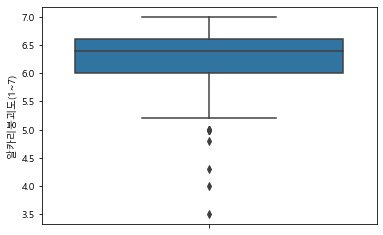

In [74]:
print('알카리붕괴도(1~7)-----------------')
plt.figure(1)
al = df.loc[:,['품종','알카리붕괴도(1~7)']]
alk=al.sort_values(by='알카리붕괴도(1~7)' ,ascending=False)
alkk=alk.dropna(axis=0)
outlier_iqr(alkk,'알카리붕괴도(1~7)')
print('--------------------------------')
sns.boxplot(y=alkk["알카리붕괴도(1~7)"])
alkk

단백질 함량(%)------------------
IQR은 0.9000000000000004 이다.
lower bound 값은 4.6499999999999995 이다.
upper bound 값은 8.25 이다.
총 이상치 개수는 2 이다.
--------------------------------


,품종,단백질 함량(%)
"(밀양237호, 신백, 82.3, 70.1, 79.2, nan, nan, nan, 1.75, 0/0, 6.7, nan, 8.5, 17.8, -0.16, nan, nan, nan, nan, nan, nan, 밥쌀용)",신백,8.5
"(밀양217호, 중모1004, 66.4, 48.1, 50.9, 24.5, nan, nan, 1.74, 0/0, 6.4, nan, 8.3, 15.1, nan, nan, nan, nan, nan, nan, nan, 가공용)",중모1004,8.3
"(수원562호, 중모1043, 80.3, 72.8, 85.0, 61.8, nan, 6.5, 1.87, 0/1, 6.5, nan, 8.2, 19.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용(혼반용))",중모1043,8.2
"(밀양240호, 한아름2호, 82.0, 72.6, 58.6, nan, nan, nan, 2.16, 2/0, 6.0, nan, 8.2, 17.5, -0.9, 1.0, nan, nan, nan, nan, nan, 초다수가공용)",한아름2호,8.2
"(계화19호, 새계화, nan, 75.1, 94.1, nan, nan, nan, nan, 0/1, 5.9, nan, 7.8, 19.3, nan, nan, nan, nan, nan, nan, nan, nan)",새계화,7.8
...,...,...
"(수원602, 해맑은, 81.8, 73.0, 93.4, 68.2, 2.1, 2.8, 1.88, 0/1, 6.7, 77.0, 5.3, 18.4, 0.47, nan, nan, nan, nan, nan, nan, 밥쌀용)",해맑은,5.3
"(수원573호, 영우, nan, nan, nan, nan, nan, nan, 2.21, 1/3, nan, nan, 5.3, 27.3, nan, nan, nan, nan, nan, nan, nan, 사료용)",영우,5.3
"(익산559호, 중모1044호, 81.4, 74.2, 91.5, 67.9, 7.6, nan, 1.69, nan, 5.4, nan, 5.3, nan, nan, nan, nan, nan, nan, nan, nan, 가공용(찰벼))",중모1044호,5.3
"(수원560호, 녹우, nan, nan, nan, nan, nan, nan, 2.01, 3/1, nan, nan, 5.3, 26.3, nan, nan, nan, nan, nan, nan, nan, 총체사료용)",녹우,5.3


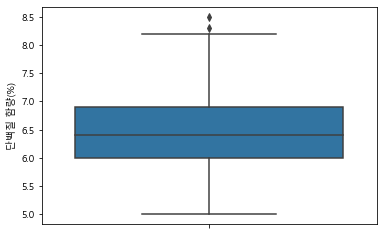

In [77]:
print('단백질 함량(%)------------------')
plt.figure(2)
pr = df.loc[:,['품종','단백질 함량(%)']]
prr=pr.sort_values(by='단백질 함량(%)' ,ascending=False)
prrr=prr.dropna(axis=0)
outlier_iqr(prrr,'단백질 함량(%)')
print('--------------------------------')
sns.boxplot(y=prrr["단백질 함량(%)"])
prrr

아밀로스함량(%)------------------
IQR은 1.1999999999999993 이다.
lower bound 값은 16.5 이다.
upper bound 값은 21.299999999999997 이다.
총 이상치 개수는 13 이다.
--------------------------------


,품종,아밀로스함량(%)
"(수원573호, 영우, nan, nan, nan, nan, nan, nan, 2.21, 1/3, nan, nan, 5.3, 27.3, nan, nan, nan, nan, nan, nan, nan, 사료용)",영우,27.3
"(밀양278호, 새미면, 81.2, 73.8, nan, nan, nan, 65.7, 2.2, 8/2, 3.5, nan, 7.0, 26.7, nan, 2.0, nan, nan, nan, nan, nan, 쌀면용)",새미면,26.7
"(수원560호, 녹우, nan, nan, nan, nan, nan, nan, 2.01, 3/1, nan, nan, 5.3, 26.3, nan, nan, nan, nan, nan, nan, nan, 총체사료용)",녹우,26.3
"(수원636호, 월하미, 83.6, 74.1, 67.8, 50.2, 17.2, 12.5, 3.2, 0/2, 7.0, 62.7, 6.8, 23.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))",월하미,23.3
"(수원624호, 케이지에이치알1호, 82.4, 73.8, 54.8, 40.5, 33.7, 9.8, 3.37, 0/1, 7.0, 64.0, 6.3, 22.7, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))",케이지에이치알1호,22.7
...,...,...
"(nan, 밀키퀸, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6.9, 14.7, nan, nan, nan, nan, nan, nan, nan, nan)",밀키퀸,14.7
"(nan, 골드퀸3호, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6.0, 12.5, nan, nan, nan, nan, nan, nan, nan, nan)",골드퀸3호,12.5
"(nan, 진상, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6.8, 11.9, nan, nan, nan, nan, nan, nan, nan, nan)",진상,11.9
"(nan, 백진주, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.6, 9.1, nan, nan, nan, nan, nan, nan, nan, nan)",백진주,9.1


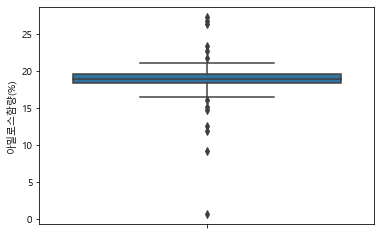

In [78]:
print('아밀로스함량(%)------------------')
plt.figure(3)
am = df.loc[:,['품종','아밀로스함량(%)']]
amm=am.sort_values(by='아밀로스함량(%)' ,ascending=False)
ammm=amm.dropna(axis=0)
outlier_iqr(ammm,'아밀로스함량(%)')
print('--------------------------------')
sns.boxplot(y=ammm["아밀로스함량(%)"])
ammm

투명도1~9------------------------
IQR은 0.0 이다.
lower bound 값은 1.0 이다.
upper bound 값은 1.0 이다.
총 이상치 개수는 31 이다.
--------------------------------


,품종,투명도1~9
"(밀양288호, 한아름찰, 78.7, 71.9, 77.9, 56.0, nan, nan, 2.13, nan, 5.6, nan, 7.5, nan, nan, 5.0, nan, nan, nan, nan, nan, 가공용:떡등)",한아름찰,5.0
"(진부7호, 오봉, 84.5, 78.9, 96.6, nan, nan, nan, 1.79, 1/1, nan, nan, nan, 19.4, nan, 5.0, nan, nan, nan, nan, nan, nan)",오봉,5.0
"(수원551호, 중모1042, 82.4, nan, nan, nan, nan, nan, 1.78, 9/0, 6.9, nan, 6.6, 18.6, nan, 4.0, nan, nan, nan, nan, nan, 양조용)",중모1042,4.0
"(밀양60호, 원풍, nan, nan, nan, nan, nan, nan, nan, 0/2, 5.0, nan, nan, 18.7, nan, 3.0, nan, nan, nan, nan, nan, nan)",원풍,3.0
"(이리392호, 대야, 84.0, 76.9, 97.1, nan, nan, nan, nan, 0, 5.7, nan, nan, 18.3, nan, 3.0, nan, nan, nan, nan, nan, nan)",대야,3.0
...,...,...
"(계화 25호, 해찬물결, 82.4, 74.8, 96.3, nan, nan, nan, 1.77, 0/0, 6.2, nan, 6.5, 18.9, nan, 1.0, nan, nan, nan, nan, nan, nan)",해찬물결,1.0
"(운봉 34호, 황금보라, 83.5, 76.7, 96.1, nan, nan, nan, nan, 0/0, 6.3, nan, 5.8, 19.3, 0.21, 1.0, nan, nan, nan, nan, nan, nan)",황금보라,1.0
"(밀양208호, 주남조생, 84.0, 75.7, 95.8, 72.5, nan, nan, nan, 0/0, 6.3, nan, 6.7, 19.8, 0.04, 1.0, nan, nan, nan, nan, nan, nan)",주남조생,1.0
"(익산 480호, 호품, nan, 76.8, 94.7, nan, nan, nan, 1.67, 0/0, 6.4, nan, nan, 18.7, 0.56, 1.0, nan, nan, nan, nan, nan, nan)",호품,1.0


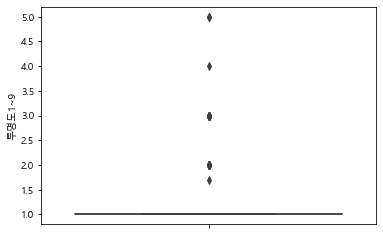

In [79]:
print('투명도1~9------------------------')
plt.figure(4)
tr = df.loc[:,['품종','투명도1~9']]
trr=tr.sort_values(by='투명도1~9' ,ascending=False)
trrr=trr.dropna(axis=0)
outlier_iqr(trrr,'투명도1~9')
print('--------------------------------')
sns.boxplot(y=trrr["투명도1~9"])
trrr

밥맛관능검정(-3∼+3)--------------
IQR은 0.34 이다.
lower bound 값은 -0.47000000000000003 이다.
upper bound 값은 0.89 이다.
총 이상치 개수는 2 이다.
--------------------------------


,품종,밥맛관능검정(-3∼+3)
"(수원387호, 화중, 83.7, 77.6, 87.1, nan, nan, nan, nan, 0/0, 6.6, nan, nan, 20.7, 0.76, 3.0, nan, nan, nan, nan, nan, nan)",화중,0.76
"(수원600호, 알찬미, 82.4, 75.8, 96.2, 72.9, 1.7, 0.6, 1.77, 0/0, 6.4, 80.4, 5.6, 18.6, 0.7, 1.0, nan, nan, nan, nan, nan, 밥쌀용(추청 대체용))",알찬미,0.70
"(익산481호, 다미, nan, 76.9, 92.2, nan, nan, nan, 1.87, 1/0, 6.5, nan, nan, 19.1, 0.68, 1.0, nan, nan, nan, nan, nan, nan)",다미,0.68
"(상주22호, 중산, nan, 74.0, nan, nan, nan, nan, 1.67, 0/1, nan, nan, 7.4, 18.2, 0.67, nan, nan, nan, nan, nan, nan, nan)",중산,0.67
"(상주24호, 새상주, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.4, 18.5, 0.65, nan, nan, nan, nan, nan, nan, nan)",새상주,0.65
...,...,...
"(익산508호, 친농, 83.9, 73.8, 84.0, 62.0, nan, nan, 1.65, 0/0, 6.5, nan, 6.4, 18.8, -0.11, 1.0, nan, nan, nan, nan, nan, 밥쌀용)",친농,-0.11
"(밀양237호, 신백, 82.3, 70.1, 79.2, nan, nan, nan, 1.75, 0/0, 6.7, nan, 8.5, 17.8, -0.16, nan, nan, nan, nan, nan, nan, 밥쌀용)",신백,-0.16
"(IS592BB, 아이에스592비비, 81.5, 72.6, 82.5, 59.9, 4.2, 12.3, 1.79, 0/1, 6.0, nan, 6.9, 18.0, -0.43, 2.0, nan, nan, nan, nan, nan, 조생종 내병성 증진을 위한 다수성 중간모본)",아이에스592비비,-0.43
"(밀양265호, 중모1034, 79.8, 69.7, 90.8, 63.3, nan, nan, 1.83, 0/1, 5.2, nan, 6.7, 19.6, -0.64, 1.0, nan, nan, nan, nan, nan, 밥쌀용)",중모1034,-0.64


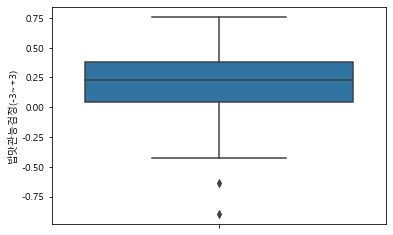

In [80]:
print('밥맛관능검정(-3∼+3)--------------')
plt.figure(1)
ba = df.loc[:,['품종','밥맛관능검정(-3∼+3)']]
baa=ba.sort_values(by='밥맛관능검정(-3∼+3)' ,ascending=False)
baaa=baa.dropna(axis=0)
outlier_iqr(baaa,'밥맛관능검정(-3∼+3)')
print('--------------------------------')
sns.boxplot(y=baaa["밥맛관능검정(-3∼+3)"])
baaa